In [1]:
# 引入必要的库
import pandas as pd
import seaborn as sns
import numpy as np

## 任务内容
需求：在jupyter下对职位信息进行可视化分析；

### 薪资相关
1. 薪资分析
2. 不同城市薪资分布
3. N薪分布
4. 工作年限与薪资

### 职位分析
1. 不同城市职位数量
2. 公司融资情况
3. 不同行业公司数量
4. 工作经验分析
5. 职位标签：词云制作

In [3]:
# 第1步读取数据
pdata = pd.read_csv('题目4数据.csv', encoding="gbk") # gbk读取 utf8有问题
pdata.head()

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
0,8280292,资深数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,企业服务,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",开发|测试|运维类,['数据分析'],...,2021/4/26 10:00,北京,海淀区,NaN,15k-30k,14,3-5年,全职,本科,"发展空间大,弹性工作制,领导Nice"
1,8437217,数据分析实习生,北京字节跳动网络技术有限公司,字节跳动,2000人以上,D轮及以上,"内容资讯,短视频","['扁平管理', '弹性工作', '就近租房补贴', '六险一金']",开发|测试|运维类,['后端开发'],...,2021/4/28 5:18,北京,海淀区,NaN,3k-6k,0,在校/应届,实习,本科,"下午茶,健身瑜伽,免费三餐,弹性工作"
2,6559839,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,['数据分析'],...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",25k-45k,0,5-10年,全职,本科,大牛团队 发展前景 薪资客观
3,8168535,数据分析师,欧科互动网络科技（北京）有限公司,欧科云链集团,500-2000人,不需要融资,区块链,"['节日礼物', '年度旅游', '扁平管理', '领导好']",产品|需求|项目类,"['商业', 'SQL', '数据分析']",...,2021/4/26 16:03,北京,海淀区,"['西北旺', '上地', '清河']",15k-30k,14,1-3年,全职,本科,发展前景好，大牛团队
4,8438943,数据分析师,北京拉勾网络技术有限公司,拉勾网,500-2000人,D轮及以上,"工具类产品,在线教育","['五险一金', '弹性工作', '带薪年假', '免费两餐']",产品|需求|项目类,"['数据分析', 'hive', 'SQL']",...,2021/4/26 10:00,北京,海淀区,NaN,15k-25k,0,1-3年,全职,本科,15薪


## 薪资相关

### 1. 薪资分析

In [5]:
pdata[pdata['salary'].isna()] # 非法数据确认

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage


In [6]:
pdata[pdata['salary'].str.match(r'^(\d+)k-(\d+)k$') == False] # 其他薪资格式确认，只有一条

,positionId,positionName,companyFullName,companyShortName,companySize,financeStage,industryField,companyLabelList,firstType,positionLables,...,createTime,city,district,businessZones,salary,salaryMonth,workYear,jobNature,education,positionAdvantage
2771,306759,数据分析实习生,杭州酷玛网络技术有限公司,酷宝数据,15-50人,A轮,"电商,数据服务","['年终分红', '绩效奖金', '股票期权', '五险一金']",产品|需求|项目类,"['商业', '数据分析']",...,2021/2/2 9:30,杭州,滨江区,"['长河', '江南']",3k以上,0,在校/应届,全职,本科,周末双休，五险一金，节日福利


In [7]:
# 将范围修改为中间值
valid_salary = pdata[pdata['salary'].str.match(r'^(\d+)k-(\d+)k$')]
psalary_match = pdata['salary'].str.extract(r'(?P<lower>\d+)k-(?P<upper>\d+)k|(?P<above>\d+)k以上')

pdata['salary_value'] = psalary_match.apply(lambda x: (float(x.lower) + float(x.upper)) / 2 if pd.isna(x.above) else float(x.above), axis=1)


In [8]:
# 打标签
pdata['salary_label'] = pd.cut(pdata['salary_value'],bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['<=10k','10k+','20k+','30k+', '40k+','50k+','60k+','70k+','80k+','90k+'])

<Axes: xlabel='salary_label', ylabel='count'>

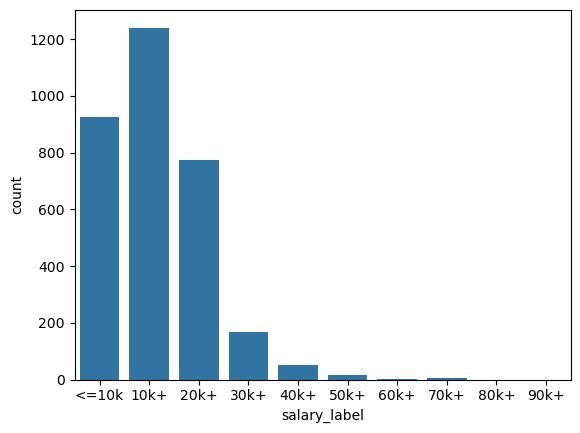

In [9]:
sns.countplot(pdata,x='salary_label') # 范围以中间值为薪资

### 2. 不同城市薪资分布

In [11]:
# sns.catplot(pdata,x='salary_label',kind='count', row='city')
cities = pdata.city.unique()
cities

array(['北京', '上海', '深圳', '南京', '武汉', '广州', '杭州', '成都', '重庆'], dtype=object)

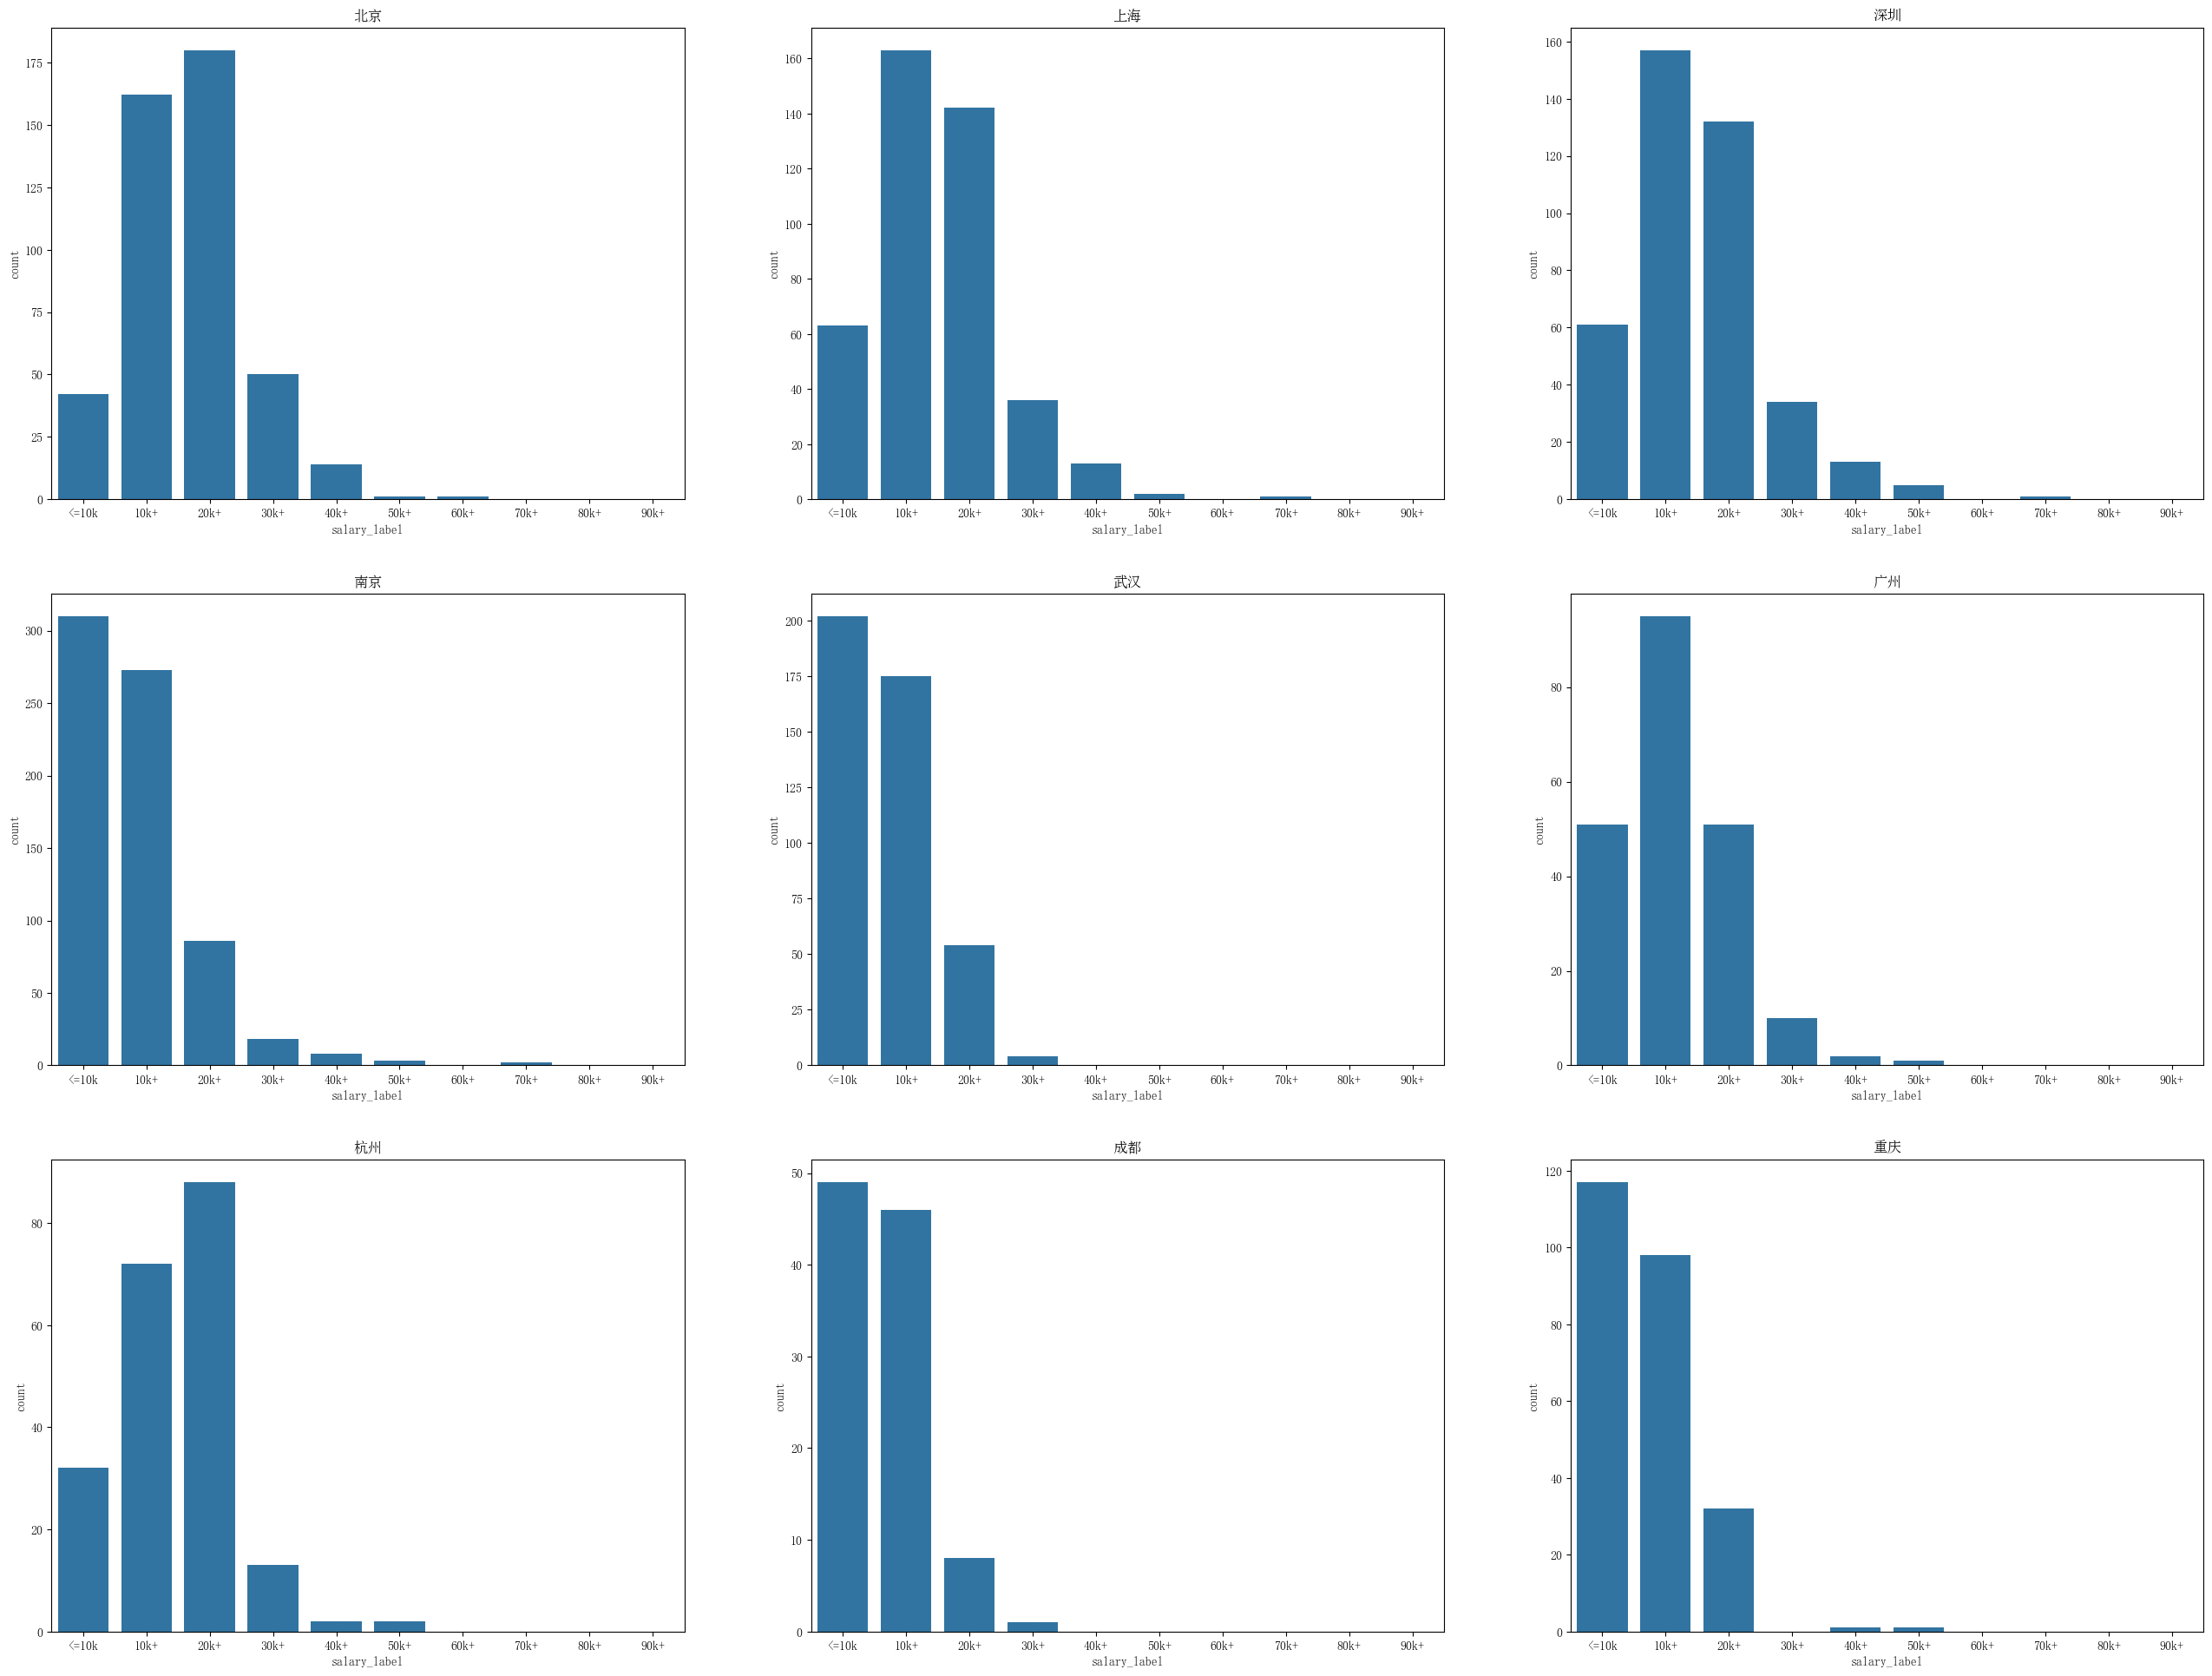

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32,24))
lens = len(cities)
plt.rcParams['font.sans-serif'] = ['SimSun']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题

for index,city in enumerate(cities):
    plt.subplot(lens//3, 3, index+1)
    ax = sns.countplot(x='salary_label', data=pdata[pdata['city']==city])
    ax.set_title(city)

### 3. N薪分布

In [14]:
pdata['n_salary'] = pdata.salaryMonth.map(lambda x: x if x != 0 else 12) # 0 认为是12薪

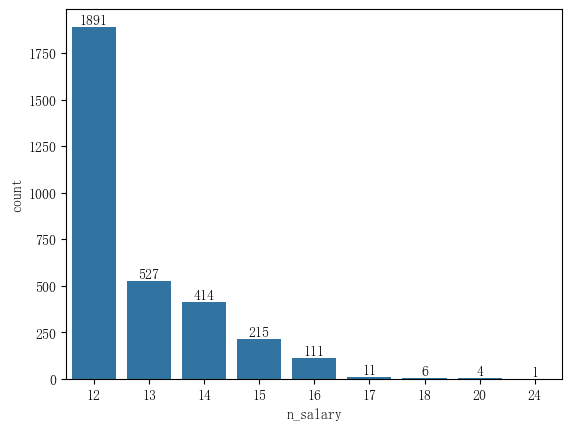

In [15]:
ax = sns.countplot(pdata, x='n_salary')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 4. 工作年限与薪资

In [17]:
pdata['workYear'].unique()

array(['3-5年', '在校/应届', '5-10年', '1-3年', '不限', '1年以下', '10年以上'],
      dtype=object)

In [18]:
pdata['year_salary'] = pdata['n_salary'] * pdata['salary_value'] # 总年薪

In [19]:
# 将工作年限映射为数值
wy_num = {
    '在校/应届': -2,
    '不限': -1,
    '1年以下': 0,
    '1-3年': 1,
    '3-5年': 3,
    '5-10年': 5,
    '10年以上': 10,
}
pdata['work_year_num'] = pdata.workYear.map(lambda wy: wy_num[wy])


[Text(-2, 0, '在校/应届'),
 Text(-1, 0, '不限'),
 Text(0, 0, '1年以下'),
 Text(1, 0, '1-3年'),
 Text(3, 0, '3-5年'),
 Text(5, 0, '5-10年'),
 Text(10, 0, '10年以上')]

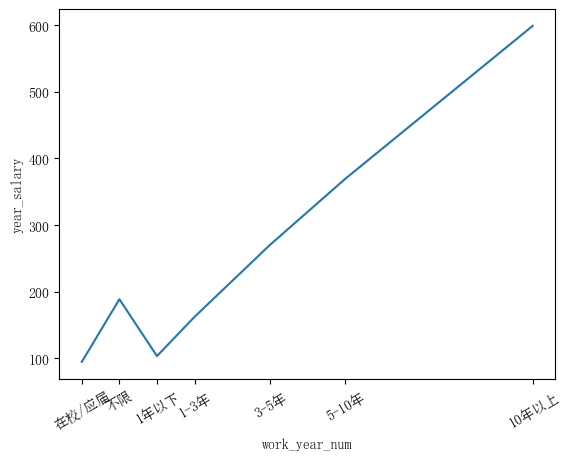

In [20]:
## 不同工作年限平均年薪
work_year_group = pdata.groupby('work_year_num')
work_year_salary_mean = work_year_group['year_salary'].agg('mean')
ax = sns.lineplot(work_year_salary_mean)

xticks = list(wy_num.values())
xticklabels = list(wy_num.keys())
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=30) 

## 职位分析

### 1. 不同城市职位数量

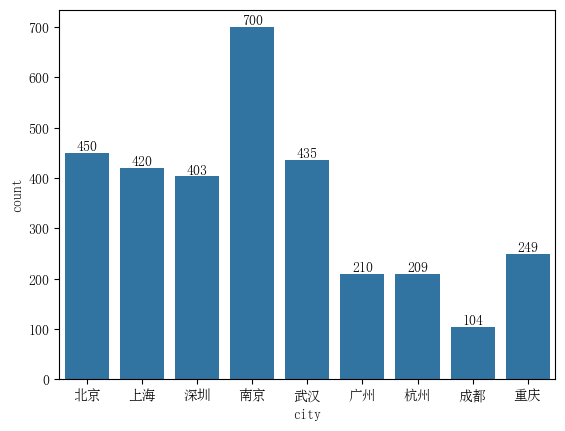

In [23]:
ax = sns.countplot(pdata, x='city')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 2. 公司融资情况

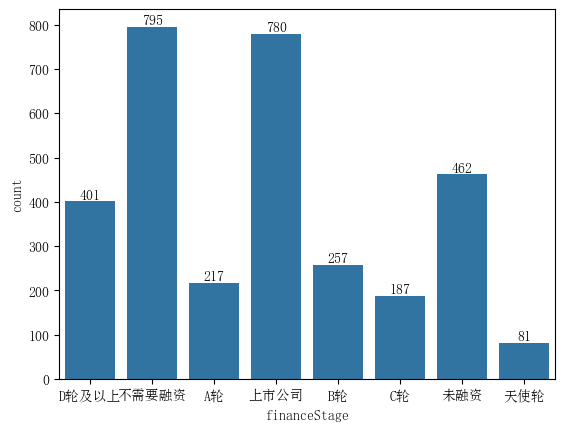

In [25]:

ax = sns.countplot(pdata, x='financeStage')
# 在每个柱状上添加数字标注
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 5),  # 向上偏移5个单位
                textcoords='offset points', 
                ha='center', va='center')

### 3. 不同行业公司数量

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2469744183.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=40)


[Text(0, 0, '软件服务｜咨询'),
 Text(1, 0, '数据服务｜咨询'),
 Text(2, 0, '人工智能服务'),
 Text(3, 0, 'IT技术服务｜咨询'),
 Text(4, 0, '移动互联网'),
 Text(5, 0, '电商'),
 Text(6, 0, '电商平台'),
 Text(7, 0, '营销服务｜咨询'),
 Text(8, 0, '物联网'),
 Text(9, 0, '数据服务'),
 Text(10, 0, '工具类产品'),
 Text(11, 0, '消费生活'),
 Text(12, 0, '游戏'),
 Text(13, 0, '企业服务'),
 Text(14, 0, '智能硬件'),
 Text(15, 0, '科技金融'),
 Text(16, 0, '其他'),
 Text(17, 0, '软件开发'),
 Text(18, 0, '信息安全'),
 Text(19, 0, '金融'),
 Text(20, 0, '内容资讯'),
 Text(21, 0, '教育'),
 Text(22, 0, '文化传媒'),
 Text(23, 0, '音频｜视频媒体'),
 Text(24, 0, '内容社区'),
 Text(25, 0, '人工智能'),
 Text(26, 0, '专业服务｜咨询'),
 Text(27, 0, '医疗丨健康'),
 Text(28, 0, '贸易｜进出口'),
 Text(29, 0, '新媒体'),
 Text(30, 0, '制造业'),
 Text(31, 0, '文娱丨内容'),
 Text(32, 0, 'MCN｜直播平台'),
 Text(33, 0, '社交媒体'),
 Text(34, 0, '社交平台'),
 Text(35, 0, '在线教育'),
 Text(36, 0, '硬件'),
 Text(37, 0, '批发｜零售'),
 Text(38, 0, '生活服务'),
 Text(39, 0, '新零售'),
 Text(40, 0, '广告营销'),
 Text(41, 0, '短视频'),
 Text(42, 0, '区块链'),
 Text(43, 0, '社交'),
 Text(44, 0, '旅游｜出行'),
 Text(

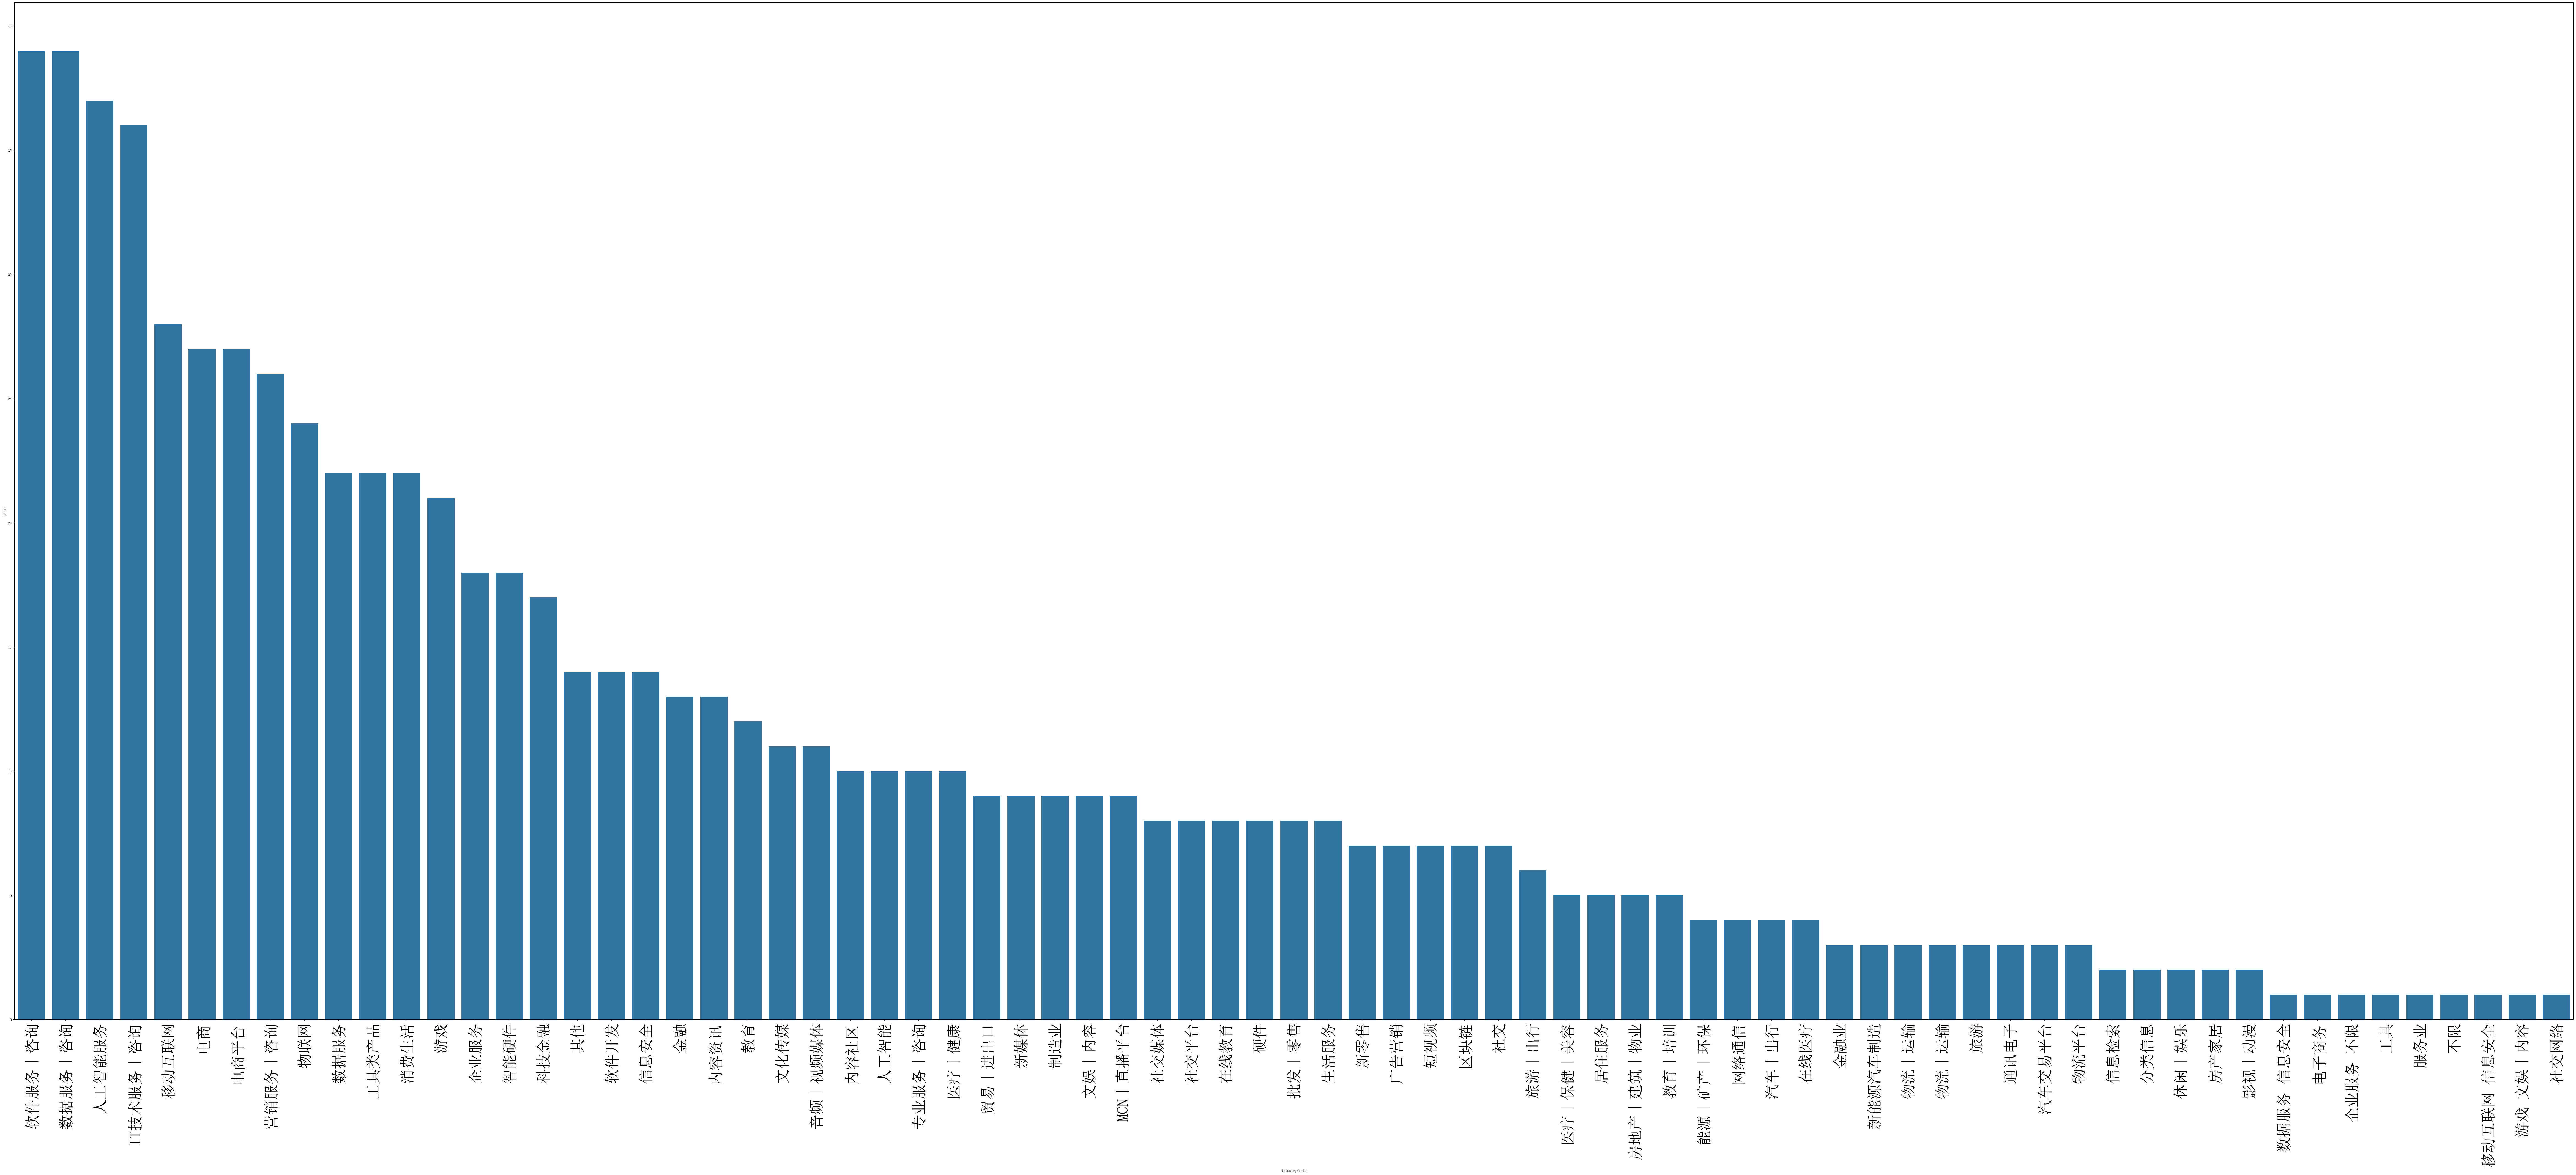

In [77]:
# 将行业标签拆分
# pdata.industryField.str.split(',')
# pdata.industryField.dropna().unique()
industry_field_data = pdata.drop_duplicates(subset=['industryField']).dropna(subset=['industryField']) # 清理nan 
#分割行业标签
industry_field_data = industry_field_data[['positionId','companyFullName', 'industryField']].set_index('companyFullName')

industry_field_data_tags = pd.DataFrame(industry_field_data.industryField.str.split(r'[、,]', expand=True).stack().droplevel(1), columns=['industryField'])
plt.figure(figsize=(120,48))
sort_x = industry_field_data_tags['industryField'].value_counts().index
ax = sns.countplot(industry_field_data_tags, x='industryField', order=sort_x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=40)


### 4. 工作经验分析

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\3539991803.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '3-5年'),
 Text(1, 0, '1-3年'),
 Text(2, 0, '不限'),
 Text(3, 0, '5-10年'),
 Text(4, 0, '在校/应届'),
 Text(5, 0, '1年以下'),
 Text(6, 0, '10年以上')]

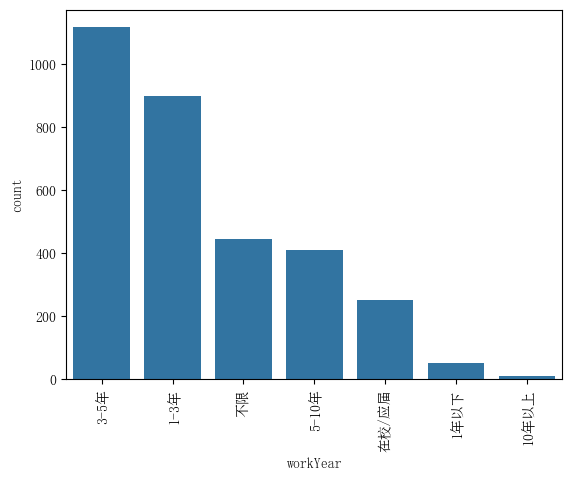

In [94]:
ax = sns.countplot(pdata, x='workYear', order=pdata['workYear'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### 5. 职位标签：词云制作

In [116]:
import wordcloud as wc
import ast

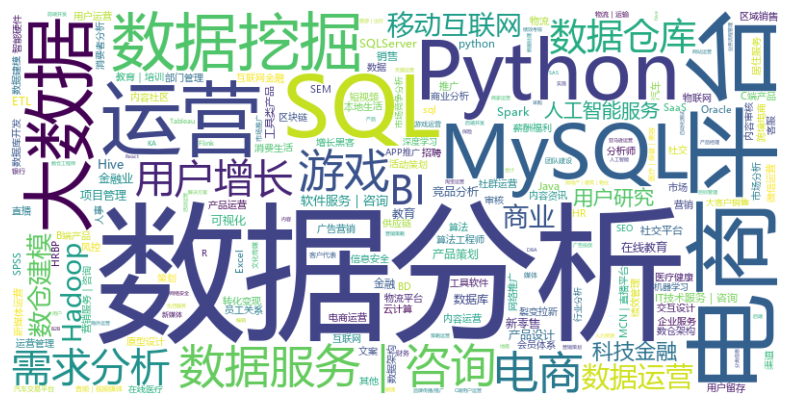

In [142]:
freq = pdata['positionLables'].dropna().apply(ast.literal_eval).explode().value_counts()
wordcloud = wc.WordCloud(
    font_path='msyh.ttc',  # 中文字体路径（如微软雅黑）
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq)  # 直接传入词频字典

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()